# Análise Explanatória de Dados com Python e SQL - IMDb



![Logo IMDb](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/IMDB_Logo_2016.svg/1200px-IMDB_Logo_2016.svg.png)

Neste mini projeto vamos passar por áreas como: análise exploratória de dados usando Linguagem Python, Linguagem SQL e Banco de Dados SQLite. 

Usaremos dados reais disponíveis publicamente, dados sobre filmes no <a href="https://www.imdb.com/interfaces/">IMDB</a>.


Ao aplicar Análise Exploratória de Dados vamos responder a estas 10 perguntas:

- 1- Quais São as Categorias de Filmes Mais Comuns no IMDB?
- 2- Qual o Número de Títulos Por Gênero?
- 3- Qual a Mediana de Avaliação dos Filmes Por Gênero?
- 4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?
- 5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?
- 6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.
- 7- Qual a Relação Entre Duração e Gênero?
- 8- Qual o Número de Filmes Produzidos Por País?
- 9- Quais São os Top 10 Melhores Filmes?
- 10- Quais São os Top 10 Piores Filmes?

## Instalando e Carregando Pacotes

In [1]:
#Instalando pacote do imdb

#Instalando o pacote do pycountry

!pip install -q imdb-sqlite
!pip install -q pycountry

In [2]:
#Carregando Pacotes
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style= 'whitegrid')

### Carregando os Dados

In [3]:
#Conectando no banco de dados
conn = sqlite3.connect('imdb.db')

In [4]:
#Extrai a lista de tabelas
tabelas = pd.read_sql_query("SELECT NAME as 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)

In [5]:
#Verificando o tipo do objeto
type(tabelas)

pandas.core.frame.DataFrame

In [6]:
#Visualizando o resultando
tabelas.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [7]:
#Convertendo o data frame em uma lista
tabelas = tabelas["Table_Name"].values.tolist()

In [8]:
#Percorrendo as tabelas no banco de dados para extrair o esquema
for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(tabela)
    resultado = pd.read_sql_query(consulta, conn)
    print("Esquema da tabela:", tabela)
    display(resultado)
    print("-"*100)
    print("\n")

Esquema da tabela: people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




# Análise Exploratória dos Dados

## 1- Quais as categorias de filmes mais comuns no IMDB?

<font color= 'yellow'>Através da análise foi possível perceber que as Séries são as mais assistidas, chegando a mais de 70% de influência na categoria. </font>

In [9]:
#Criando consulta ao SQL

consulta1 = '''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type'''

In [10]:
#Extraindo o resultado
resultado1 = pd.read_sql_query(consulta1, conn)

In [11]:
#Visualizando o Resultado
display(resultado1)

,type,COUNT
0,movie,589696
1,radioEpisode,1
2,short,833778
3,tvEpisode,6104901
4,tvMiniSeries,39993
5,tvMovie,133169
6,tvPilot,2
7,tvSeries,216081
8,tvShort,10320
9,tvSpecial,34276


In [12]:
#Calculando o percentual para cada tipo
resultado1['percentual'] = (resultado1['COUNT'] / resultado1['COUNT'].sum()) * 100

In [13]:
#Visualizando o resultado (percentual adicionado)
display(resultado1)

,type,COUNT,percentual
0,movie,589696,7.091893
1,radioEpisode,1,0.000012
2,short,833778,10.027309
3,tvEpisode,6104901,73.419701
4,tvMiniSeries,39993,0.480970
5,tvMovie,133169,1.601538
6,tvPilot,2,0.000024
7,tvSeries,216081,2.598667
8,tvShort,10320,0.124112
9,tvSpecial,34276,0.412215


In [14]:
#Criando gráficos

others = {}

#Filtrando o percentual em% e somando o total
others['COUNT'] = resultado1[resultado1['percentual'] < 5]['COUNT'].sum()

#Gravando o percentual
others['percentual'] = resultado1[resultado1['percentual']<5]['percentual'].sum()

#Ajustando o nome da coluna
others['type'] = 'others'

In [15]:
#Visualizando
others

{'COUNT': 786697, 'percentual': 9.461096668796133, 'type': 'others'}

In [16]:
#Filtrando o dataframe de resultado, onde o percentual for maior que 5
resultado1 = resultado1[resultado1['percentual'] >  5]

In [17]:
#Adicionando com o data frame de outras categorias
resultado1 = resultado1.append(others, ignore_index= True)

In [18]:
#Ordenando o resultado
resultado1 = resultado1.sort_values(by = 'COUNT', ascending= False)

In [19]:
#Visualizando o data frame filtrado e ordenado
resultado1.head()

,type,COUNT,percentual
2,tvEpisode,6104901,73.419701
1,short,833778,10.027309
3,others,786697,9.461097
0,movie,589696,7.091893


In [20]:
#Ajustando labels
labels = [str(resultado1['type'][i])+''+'['+str(round(resultado1['percentual'][i],2)) + '%' +']' for i in resultado1.index]

<function matplotlib.pyplot.show(close=None, block=None)>

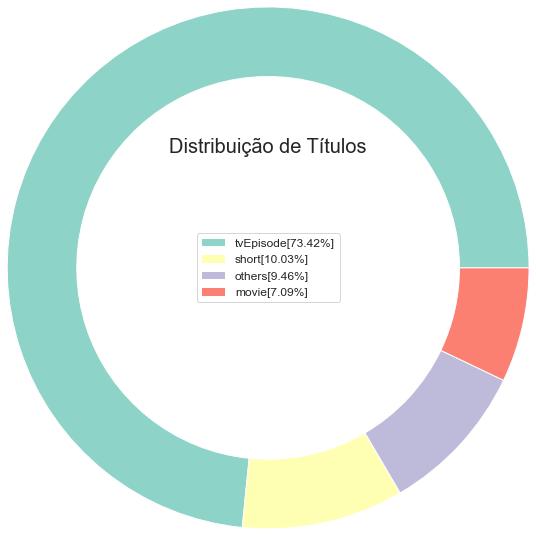

In [21]:
#Plot

cs = cm.Set3(np.arange(100))

#Criando imagem

imagem = plt.figure()

#Pieplot

plt.pie(resultado1['COUNT'], labeldistance=1,
        radius=3,
        colors = cs,
        wedgeprops= dict(width = 0.8))

plt.legend(labels = labels,
            loc = 'center',
            prop = {'size':12})

plt.title('Distribuição de Títulos',
            loc = 'Center',
            fontdict = {'fontsize':20,'fontweight':20})

plt.show

Podemos verificar através do gráfico que séries são mais produzidas que outros tipos de conteúdo em vídeo. 


## 2 - Qual o número de Títulos por Gênero?

In [22]:
#Criando consulta SQL agrupando por gêneros
consulta2 = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres'''

In [23]:
resultado2 = pd.read_sql_query(consulta2, conn)

In [24]:
#Visualizando o resultado
display(resultado2)

,genres,COUNT(*)
0,Action,13464
1,"Action,Adult",11
2,"Action,Adult,Adventure",1
3,"Action,Adult,Comedy",5
4,"Action,Adult,Crime",10
...,...,...
1443,"Thriller,Western",39
1444,War,1262
1445,"War,Western",9
1446,Western,4040


In [25]:
#Tratando strings - Convertendo para minúsculo
resultado2['genres'] = resultado2['genres'].str.lower().values

In [26]:
#Tratando strings - removendo valores ausentes (NA)
temp = resultado2['genres'].dropna()

In [27]:
#Contando o número de filmes de cada gênero com o Countvectorizer (converte a coluna para one hot encoded)

#Procurando por padrão de expressão regular
padrao = '(?u)\\b[\\w-]+\\b'

vetor = CountVectorizer(token_pattern=padrao,
                        analyzer = 'word').fit(temp)

type(vetor)

sklearn.feature_extraction.text.CountVectorizer

In [28]:
#Aplicando a vetorização ao dataset sem valores NA
bag_generos = vetor.transform(temp)

type(bag_generos)

scipy.sparse.csr.csr_matrix

In [29]:
#Retornando os gêneros no nosso dataset (valores únicos)
gen_unicos = vetor.get_feature_names()

In [30]:
#Criando o dataframe de gêneros
generos_filme = pd.DataFrame(bag_generos.todense(),
                            columns= gen_unicos,
                            index = temp.index)

#Visualizando data frame

generos_filme.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448 entries, 0 to 1447
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1448 non-null   int64
 1   adult        1448 non-null   int64
 2   adventure    1448 non-null   int64
 3   animation    1448 non-null   int64
 4   biography    1448 non-null   int64
 5   comedy       1448 non-null   int64
 6   crime        1448 non-null   int64
 7   documentary  1448 non-null   int64
 8   drama        1448 non-null   int64
 9   family       1448 non-null   int64
 10  fantasy      1448 non-null   int64
 11  film-noir    1448 non-null   int64
 12  game-show    1448 non-null   int64
 13  history      1448 non-null   int64
 14  horror       1448 non-null   int64
 15  music        1448 non-null   int64
 16  musical      1448 non-null   int64
 17  mystery      1448 non-null   int64
 18  n            1448 non-null   int64
 19  news         1448 non-null   int64
 20  reality-

In [31]:
#Tratando valores - coluna N

generos_filme = generos_filme.drop(columns= 'n', axis = 0)

In [32]:
#Calculando percentual de influência do gênero
generos_percentual = 100 * pd.Series(generos_filme.sum()).sort_values(ascending=False) / generos_filme.shape[0]

In [33]:
#Visualizando dados
generos_percentual.head(10)

drama          18.370166
comedy         16.919890
documentary    15.953039
adventure      14.848066
action         14.640884
romance        13.466851
crime          13.052486
mystery        12.569061
thriller       12.361878
fantasy        12.292818
dtype: float64

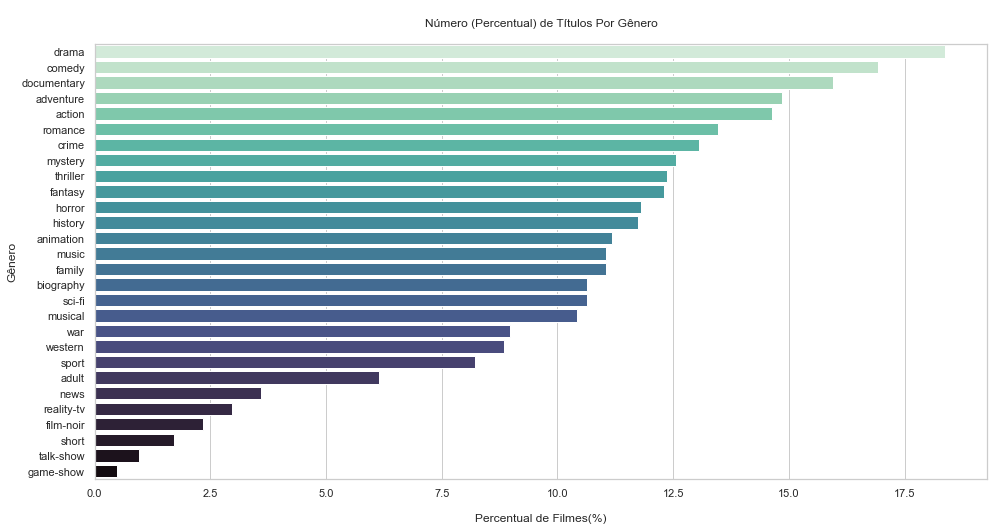

In [34]:
#Gerando gráfico
plt.figure(figsize= (16,8))
sns.barplot(x = generos_percentual.values,
            y = generos_percentual.index,
            orient = 'h',
            palette = 'mako_r')  
plt.ylabel('Gênero')
plt.xlabel('\nPercentual de Filmes(%)')
plt.title('\nNúmero (Percentual) de Títulos Por Gênero\n')
plt.show()

Conforme o gráfico mostra, há grandes números de filmes do gêneros <font color = 'yellow'>drama, comédia e documentário. </font>

## 3 - Qual a Mediana de Avaliação dos Filmes Por Gênero?

In [35]:
#Consulta SQL

consulta3 = '''
            SELECT rating, genres FROM
            ratings JOIN titles ON ratings.title_id = titles.title_id
            WHERE premiered <= 2022 AND type = 'movie' '''

In [36]:
#Resultado
resultado3 = pd.read_sql_query(consulta3, conn)

In [37]:
#Visualizando
display(resultado3)

,rating,genres
0,4.5,\N
1,6.1,"Action,Adventure,Biography"
2,5.2,Drama
3,4.5,Drama
4,3.8,Drama
...,...,...
269161,3.5,"Action,Adventure,Thriller"
269162,5.8,Thriller
269163,6.4,"Drama,History"
269164,3.8,"Adventure,History,War"


In [38]:
#Função que retorna os gêneros
def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern= '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos = vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos

In [39]:
#Aplicando função

generos_unicos = retorna_generos(resultado3)

#Visualizando dados

generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [40]:
#Criando lista que vão armazenar os valores de contagens para saber qual é o preferido
genero_counts = []
genero_ratings = []

In [41]:
#Loop para contagem dos valores

for item in generos_unicos:

    #Retornando a contagem de filmes por gênero
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE' + '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_counts.append(resultado.values[0][0])

    #Retornando a avaliação de filmes
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE'+'\''+'%'+item+'%'+'\'AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_ratings.append(np.median(resultado['rating']))

In [42]:
#Preparando o dataframe final
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos
df_genero_ratings['count'] = genero_counts
df_genero_ratings['rating'] = genero_ratings

In [43]:
#Visualizando os 30 primeiro valores do data frame
df_genero_ratings.head(30)

,genres,count,rating
0,action,28861,5.80
1,adult,4096,5.80
2,adventure,17642,6.00
3,animation,4705,6.50
4,biography,8106,7.00
5,comedy,67002,6.00
6,crime,23175,6.10
7,documentary,39549,7.30
8,drama,119492,6.30
9,family,10186,6.30


In [44]:
#Podemos ver que o índice de nº 18 é News - Não queremos esse indice na nossa coluna de gênero
#Logo, podemos excluí-la do nosso data frame

df_genero_ratings = df_genero_ratings.drop(index = 18)

In [45]:
#Ordenando o Resultado
df_genero_ratings = df_genero_ratings.sort_values(by = 'rating', ascending = False)

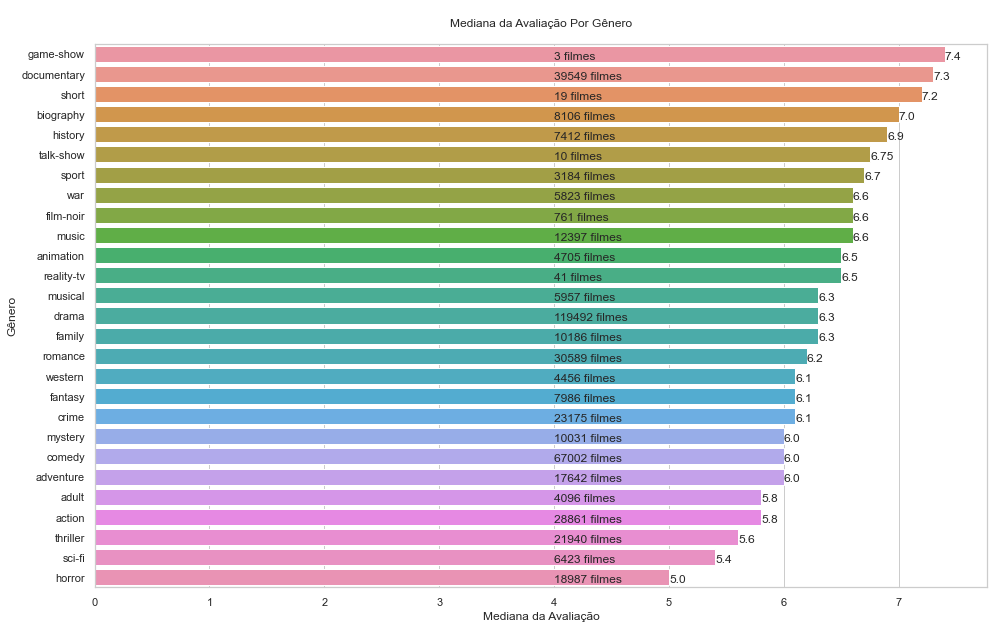

In [46]:
#Gerando gráfico para visualizar

plt.figure(figsize=(16,10))

#Barplot
sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = 'h')

#Colocando textos no gráfico
for i in range(len(df_genero_ratings.index)):
    
    plt.text(4.0,
            i + 0.25,
            str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + " filmes")

    plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
            i + 0.25,
            round(df_genero_ratings['rating'][df_genero_ratings.index[i]],2))

plt.ylabel('Gênero')
plt.xlabel('Mediana da Avaliação')
plt.title('\nMediana da Avaliação Por Gênero\n')
plt.show()

## 4 - Qual a Mediana de Avaliação dos Filmes em Relação ao Ano de Estréia?

In [47]:
#Consultando o SQL

consulta4 = '''
            SELECT rating as Rating, premiered FROM
            ratings JOIN titles ON ratings.title_id = titles.title_id
            WHERE premiered <= 2022  AND type = 'movie'
            ORDER BY premiered
            '''

In [48]:
#Resultado
resultado4 = pd.read_sql_query(consulta4, conn)

#Mostrando o resultado da consullta
display(resultado4)

,Rating,premiered
0,6.4,1896
1,4.4,1897
2,3.9,1899
3,3.7,1899
4,6.0,1900
...,...,...
269161,4.8,2021
269162,9.1,2021
269163,5.4,2021
269164,5.9,2021


In [49]:
#Calculando a  mediana ao longo do tempo (anos) - Série temporal

ratings = []
for ano in set(resultado4['premiered']):
    ratings.append(np.median(resultado4[resultado4['premiered'] == ano]['Rating']))

In [50]:
ratings[1:10]

[4.4, 3.8, 5.9, 4.6, 3.5, 4.6, 5.4, 4.5, 3.6]

In [51]:
#Lista de anos
anos = list(set(resultado4['premiered']))

#Imprimindo 10 valores ano
anos[1:11]

[1897, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907]

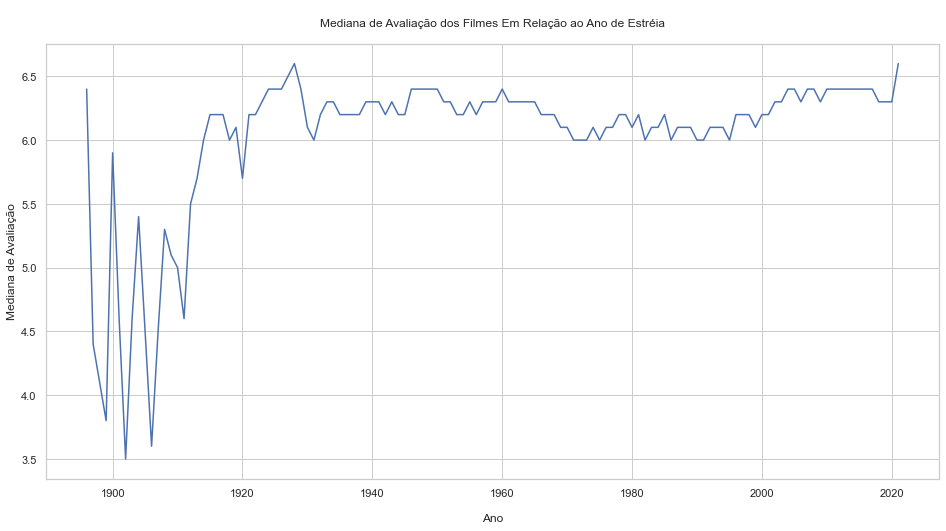

In [52]:
#Gerando gráfico da mediana de avaliação dos filmes

plt.figure(figsize=(16,8))
plt.plot(anos, ratings)
plt.xlabel('\nAno')
plt.ylabel('Mediana de Avaliação')
plt.title('\nMediana de Avaliação dos Filmes Em Relação ao Ano de Estréia\n')
plt.show()

Há de se notar maiores avaliações com o decorrer do tempo.
 Podemos dar créditos a disseminação da internet no mundo, facilitando o acesso à filmes em todo o planeta.

## 5 - Qual o número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?

In [53]:
#Criando consulta ao banco SQL
consulta5 = '''SELECT genres FROM titles'''

In [54]:
#Verificando resultado
resultado5 = pd.read_sql_query(consulta5, conn)

#Imprimindo resultado
display(resultado5)

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
8315067,"Action,Drama,Family"
8315068,"Action,Drama,Family"
8315069,"Action,Drama,Family"
8315070,Short


In [55]:
#Criando varia´vel de Gêneros únicos
genr_unicos = retorna_generos(resultado5)

#Visualizando resultado
genr_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [56]:
#Fazendo a contagem de gêneros únicos
genero_count = []
for genero in genr_unicos:
    consulta = 'SELECT COUNT(*) COUNT FROM titles WHERE genres LIKE' + '\''+'%'+genero+'%'+'\' AND type=\'movie\' AND premiered <= 2022'
    resultado = pd.read_sql_query(consulta, conn)
    genero_count.append(resultado['COUNT'].values[0])

In [57]:
#Prepatando o dataframe
df_genero_count = pd.DataFrame()
df_genero_count['Genre'] = genr_unicos
df_genero_count['Count'] = genero_count

In [58]:
df_genero_count

,Genre,Count
0,action,41662
1,adult,8216
2,adventure,22688
3,animation,6555
4,biography,13244
5,comedy,89431
6,crime,30319
7,documentary,102201
8,drama,187649
9,family,14479


In [59]:
#Calculando o top 5
df_genero_count = df_genero_count[df_genero_count['Genre'] != 'n']
df_genero_count = df_genero_count.sort_values(by = 'Count', ascending = False)
top5 =df_genero_count.head()['Genre'].values

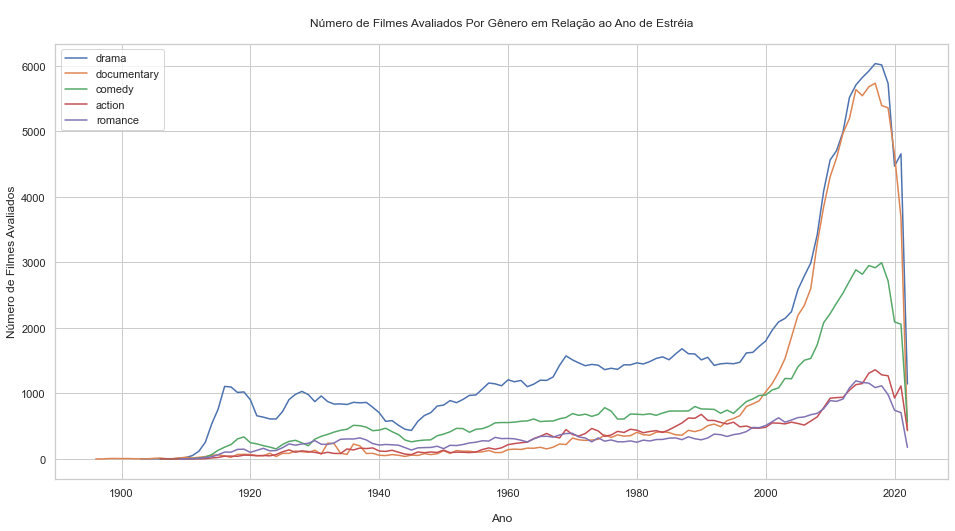

In [60]:
#Gerando gráfica

plt.figure(figsize= (16,8))

#Loop para gerar o plot

for valor in top5:
    consulta = 'SELECT COUNT(*) Number_of_movies, premiered Year FROM titles WHERE genres LIKE'+'\''+'%'+valor+'%'+'\' AND type=\'movie\' AND Year <= 2022 GROUP BY Year'
    resultado = pd.read_sql_query(consulta, conn)
    plt.plot(resultado['Year'], resultado['Number_of_movies'])

plt.xlabel('\nAno')
plt.ylabel('Número de Filmes Avaliados')
plt.title('\nNúmero de Filmes Avaliados Por Gênero em Relação ao Ano de Estréia\n')
plt.legend(labels = top5)
plt.show()

O gráfico acima mostra um aumento não só nas avaliações, como também nos mostra que com o passar dos anos, foram realizados mais filmes em todos os gêneros. O que pode mostrar também um avanço nas produtoras no que se trata a produção de filmes.

## 6- Qual o Filme com Maior Tempo de Duração?

Calculando Percentis

In [61]:
#Criando consulta ao SQL

consulta6 = '''
            SELECT runtime_minutes Runtime
            FROM titles
            WHERE type = 'movie' AND Runtime != 'NaN'
            '''

In [62]:
#Resultado da consulta
resultado6 = pd.read_sql_query(consulta6, conn)

#Mostrando resultado a consulta
display(resultado6)

,Runtime
0,100
1,70
2,90
3,120
4,58
...,...
371046,123
371047,57
371048,100
371049,116


In [63]:
#Loop para criar os percentis

for valor in range(101):
    val = valor
    percentil = round(np.percentile(resultado6['Runtime'].values, val), 2)
    print(f'{val} percentil da duração (runtime) é: {percentil}')

0 percentil da duração (runtime) é: 1.0
1 percentil da duração (runtime) é: 45.0
2 percentil da duração (runtime) é: 48.0
3 percentil da duração (runtime) é: 50.0
4 percentil da duração (runtime) é: 50.0
5 percentil da duração (runtime) é: 52.0
6 percentil da duração (runtime) é: 52.0
7 percentil da duração (runtime) é: 54.0
8 percentil da duração (runtime) é: 55.0
9 percentil da duração (runtime) é: 56.0
10 percentil da duração (runtime) é: 58.0
11 percentil da duração (runtime) é: 59.0
12 percentil da duração (runtime) é: 60.0
13 percentil da duração (runtime) é: 60.0
14 percentil da duração (runtime) é: 60.0
15 percentil da duração (runtime) é: 62.0
16 percentil da duração (runtime) é: 63.0
17 percentil da duração (runtime) é: 65.0
18 percentil da duração (runtime) é: 66.0
19 percentil da duração (runtime) é: 68.0
20 percentil da duração (runtime) é: 70.0
21 percentil da duração (runtime) é: 70.0
22 percentil da duração (runtime) é: 71.0
23 percentil da duração (runtime) é: 72.0
24 

In [64]:
#Refazendo consulta ao banco de dados e retornando o filme com maior duração
consulta6 = '''
            SELECT runtime_minutes Runtime, primary_title
            FROM titles
            WHERE type = 'movie' AND Runtime != 'NaN'
            ORDER BY Runtime DESC
            LIMIT 1
            '''

In [65]:
#Gerando resultado
resultado6 = pd.read_sql_query(consulta6, conn)

#Mostrando resultado 
resultado6

,Runtime,primary_title
0,51420,Logistics


O resultado da nossa consulta mostra que "Logistics", dirigido por Daniel Anderson e Erika Magnusson é o filme mais longo da história registrado no IMDB, com 857 horas.

## 7 - Qual a Relação entre Duração e Gênero?

In [66]:
#Criando consulta ao banco de dados SQL
consulta7 = '''
            SELECT AVG(runtime_minutes) Runtime, genres
            FROM titles
            WHERE type = 'movie'
            AND runtime_minutes != 'NaN'
            GROUP BY genres
            '''

In [67]:
#Verificando resultando da consulta
resultado7 = pd.read_sql_query(consulta7, conn)

#imprimindo resultado
resultado7

,Runtime,genres
0,99.333195,Action
1,77.000000,"Action,Adult"
2,69.000000,"Action,Adult,Adventure"
3,74.000000,"Action,Adult,Comedy"
4,84.666667,"Action,Adult,Crime"
...,...,...
1360,93.928571,"Thriller,Western"
1361,93.313356,War
1362,98.000000,"War,Western"
1363,72.286429,Western


In [68]:
#Retornando gêneros únicos
gen_unicos = retorna_generos(resultado7)

#Visualizando Gêneros únicos
gen_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [69]:
#Calculando a duração por gênero

genero_runtime = []
for genero in gen_unicos:
    consulta = 'SELECT runtime_minutes Runtime FROM titles WHERE genres LIKE'+'\''+'%'+genero+'%'+'\' AND type=\'movie\' AND Runtime!=\'NaN\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_runtime.append(np.median(resultado['Runtime']))

In [70]:
#Preparando o data frame
df_genero_runtime = pd.DataFrame()
df_genero_runtime['Genre'] = gen_unicos
df_genero_runtime['Runtime'] = genero_runtime

#Visualizando DF
df_genero_runtime

,Genre,Runtime
0,action,93.0
1,adult,77.0
2,adventure,90.0
3,animation,82.0
4,biography,87.0
5,comedy,91.0
6,crime,92.0
7,documentary,74.0
8,drama,93.0
9,family,89.0


In [71]:
#Removendo índice 18 - Notícias (news)
df_genero_runtime = df_genero_runtime.drop(index = 18)

In [72]:
#Ordenando os dados do data frame
df_genero_runtime = df_genero_runtime.sort_values(by ='Runtime', ascending=False)

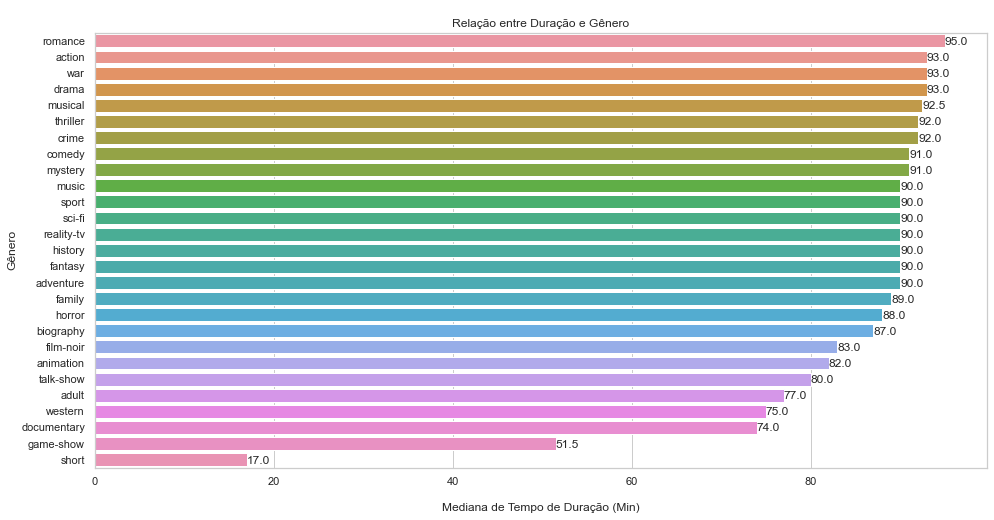

In [73]:
#Gerando gráfico de valores

plt.figure(figsize= (16,8))

#Gráfico de Barras
sns.barplot(y = df_genero_runtime.Genre, x = df_genero_runtime.Runtime, orient='h')

#Loop 
for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.Runtime[df_genero_runtime.index[i]],
    i + 0.25,
    round(df_genero_runtime['Runtime'][df_genero_runtime.index[i]], 2))



plt.ylabel('Gênero')
plt.xlabel('\nMediana de Tempo de Duração (Min)')
plt.title('\nRelação entre Duração e Gênero')
plt.show()

Pode-se verificar que filmes relacionados à <font color = 'yellow'> romance, ação e guerra </font> possuem um maior tempo de duração, podendo relacioná-los ao tipo de enredo e história por trás contada.

## 8 - Qual o Número de Filmes Froduzidos por País?

In [74]:
#Consultando o Banco de Dados
consulta8 = '''
            SELECT region, COUNT(*) Number_of_movies FROM
            akas JOIN titles ON
            akas.title_id = titles.title_id
            WHERE region != 'None'
            AND type = \'movie\'
            GROUP BY region
            '''

In [75]:
#Gerando resultado da pesquisa
resultado8 = pd.read_sql_query(consulta8, conn)

#Visualizando resulado
display(resultado8)

,region,Number_of_movies
0,AD,22
1,AE,962
2,AF,110
3,AG,12
4,AL,1237
...,...,...
229,YUCS,146
230,ZA,3059
231,ZM,11
232,ZRCD,2


In [76]:
#Verificando o tamanho da pesquisa
tamanho = resultado8.shape
linhas = resultado8.shape[0]
colunas = resultado8.shape[1]

print(f'Nossa pesquisa tem o tamanho total de {tamanho}, {linhas} linhas e {colunas} colunas.')

Nossa pesquisa tem o tamanho total de (234, 2), 234 linhas e 2 colunas.


In [77]:
#Criando uma listas auxiliares
nomes_paises = []
contagem = []

#Obtendo país de acordo com sua região
for pais in range(resultado8.shape[0]):
    try:
        coun = resultado8['region'].values[pais]
        nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name)
        contagem.append(resultado8['Number_of_movies'].values[pais])
    except:
        continue

In [78]:
#Preparando data frame
df_filmes_paises = pd.DataFrame()
df_filmes_paises['Paises'] = nomes_paises
df_filmes_paises['Contagem_de_Filmes'] = contagem
                    

In [79]:
#Ordenando o Resultado
df_filmes_paises = df_filmes_paises.sort_values(by  = 'Contagem_de_Filmes', ascending = False)

#Visualizando os dados

df_filmes_paises.head(10)

,Paises,Contagem_de_Filmes
199,United States,298238
65,United Kingdom,153199
96,Japan,89175
63,France,82039
89,India,75028
32,Canada,71294
47,Germany,67561
93,Italy,63847
26,Brazil,63046
58,Spain,62631


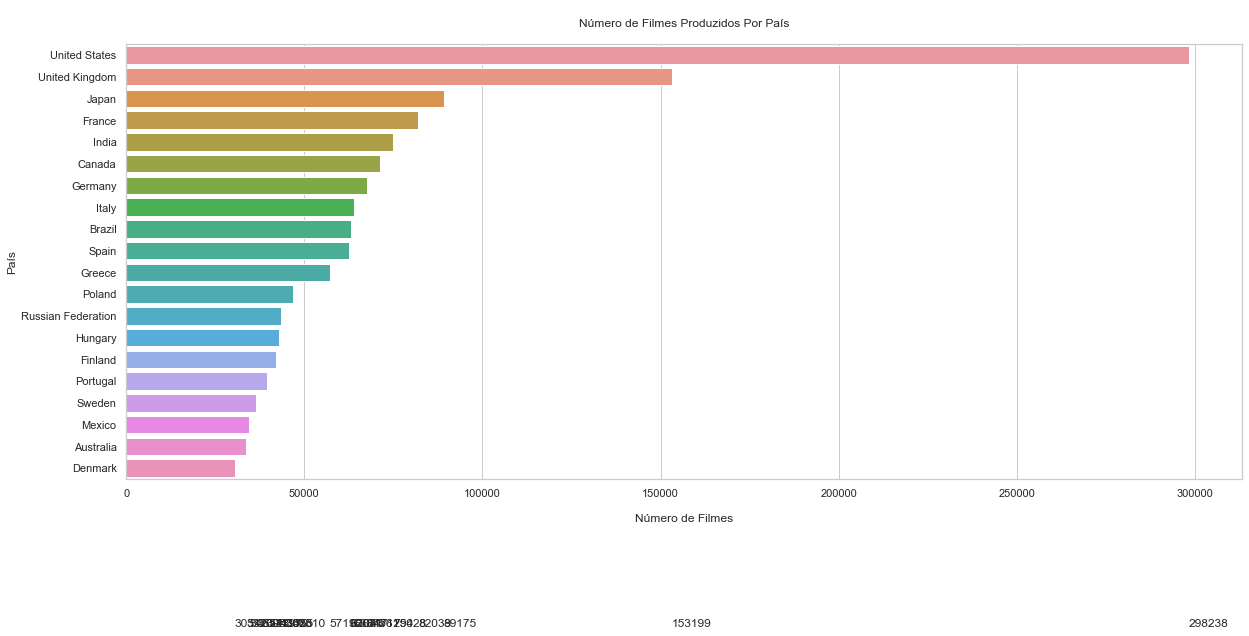

In [80]:
#Gerando o gráfico

plt.figure(figsize= (20,8))

#Gerando gráfico de barras
sns.barplot(y = df_filmes_paises[:20].Paises,
            x = df_filmes_paises[:20].Contagem_de_Filmes,
            orient = 'h')

#Gerando loop para colocar nome nos valores
for valor in range(0,20):
    plt.text(df_filmes_paises.Contagem_de_Filmes[df_filmes_paises.index[valor]]-1,
    i + 0.30,
    round(df_filmes_paises['Contagem_de_Filmes'][df_filmes_paises.index[valor]], 2))


plt.ylabel('País')
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos Por País\n')
plt.show()

Através da análise realizada pode-se perceber que os Estados Unidos é o maior produtor de filmes, grande parte se dá pela influência de Holywood, considerado uma das principais áreas inovadoras e produtora de conteúdo em vídeo.

## 9 - Quais Sãos os Tops 10 Melhores Filmes?

In [81]:
#Criando consulta ao Banco de Dados
consulta9 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM
            titles JOIN ratings
            ON titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating DESC
            LIMIT 10 
            '''

In [82]:
#Verificando resultado
top10_filmes = pd.read_sql_query(consulta9, conn)

#Mostrando valores
display(top10_filmes)

,Movie_Name,genres,rating
0,The Shawshank Redemption,Drama,9.3
1,The Chaos Class,"Comedy,Drama",9.3
2,The Godfather,"Crime,Drama",9.2
3,Soorarai Pottru,Drama,9.1
4,CM101MMXI Fundamentals,"Comedy,Documentary",9.1
5,12 Angry Men,"Crime,Drama",9.0
6,The Godfather: Part II,"Crime,Drama",9.0
7,The Dark Knight,"Action,Crime,Drama",9.0
8,David Attenborough: A Life on Our Planet,"Biography,Documentary",9.0
9,Schindler's List,"Biography,Drama,History",8.9


Pode-se ver filmes que são relacionados ao gênero drama são considerados bons, tendo 80% de participação no top 10.

## 10 - Quais São os Top 10 Piores Filmes?

In [83]:
#Criando consulta no banco de Dados
consulta10 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM
            titles JOIN ratings
            ON titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating ASC
            LIMIT 10
            '''

In [84]:
#Verificando resultado
top10_piores =pd.read_sql_query(consulta10, conn)

#Imprimindo resultado
display(top10_piores)

,Movie_Name,genres,rating
0,Cumali Ceber,Comedy,1.0
1,Smolensk,"Drama,Thriller",1.1
2,Sadak 2,"Action,Drama",1.1
3,Reis,"Biography,Drama",1.4
4,Justin Bieber: Never Say Never,"Documentary,Music",1.6
5,Manos: The Hands of Fate,"Drama,Horror",1.8
6,Radhe,"Action,Crime,Thriller",1.8
7,Superbabies: Baby Geniuses 2,"Comedy,Family,Sci-Fi",1.9
8,The Hottie & the Nottie,"Comedy,Romance",1.9
9,Disaster Movie,"Comedy,Sci-Fi",1.9
